In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
df = pd.read_csv("/media/lord-kavya/AAD2DDCAD2DD9B41/Users/kavyagada/Kavya_Gada/Machine_Learning(ML)/College Assignment/Mini Project/archive/Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


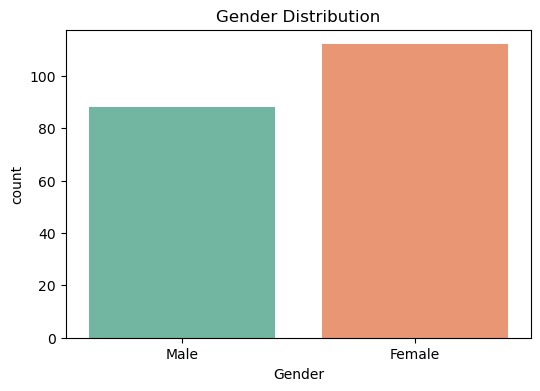

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title('Gender Distribution')
plt.show()

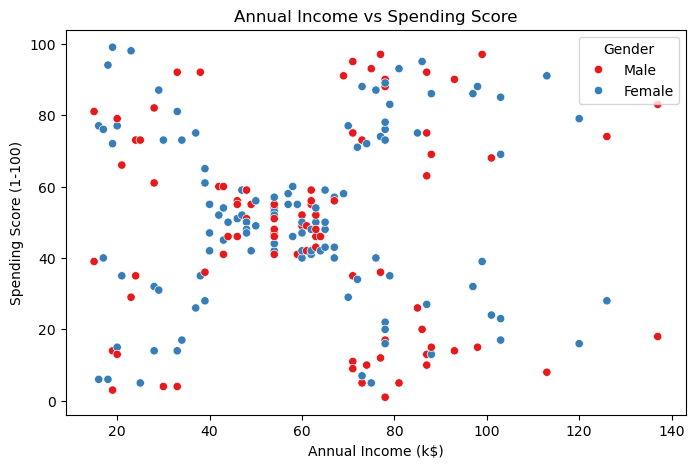

In [6]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='Set1')
plt.title('Annual Income vs Spending Score')
plt.show()

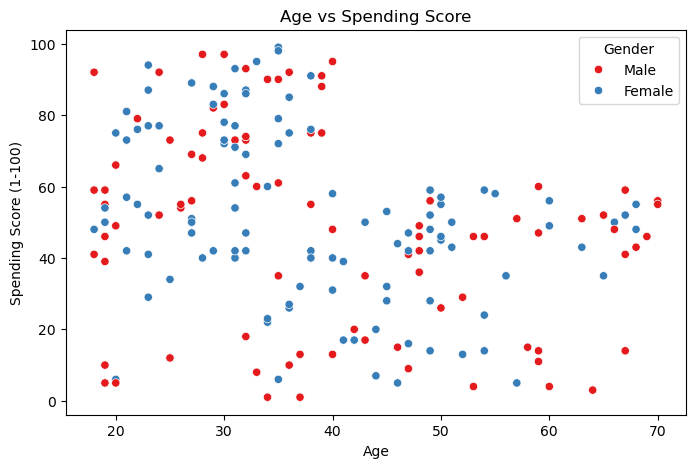

In [7]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Gender', palette='Set1')
plt.title('Age vs Spending Score')
plt.show()

In [8]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

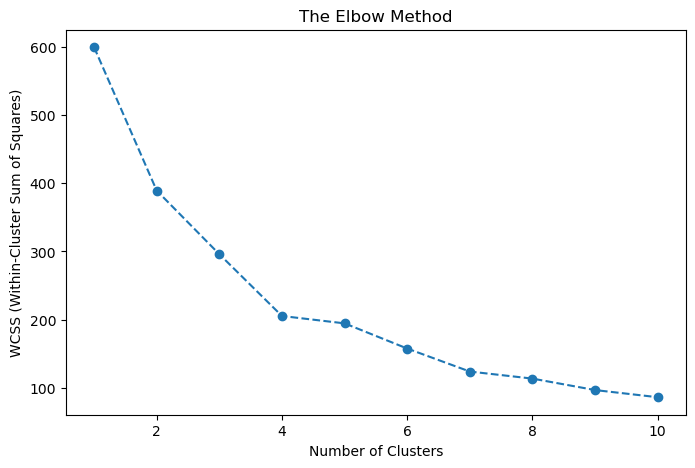

In [10]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=4)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


In [12]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)


In [13]:
df['Cluster'] = y_kmeans
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


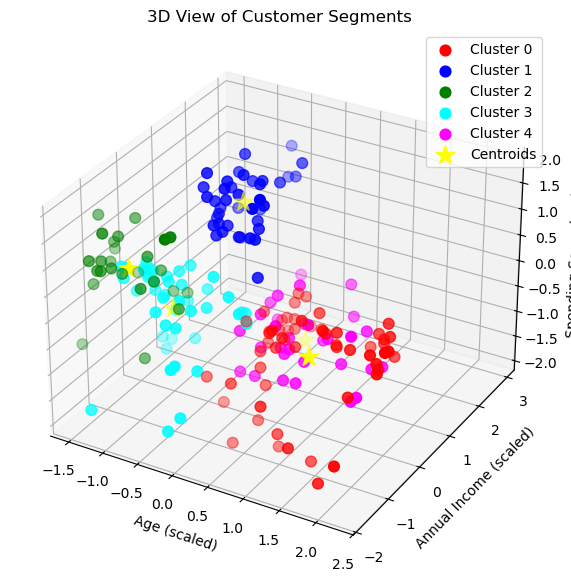

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], X_scaled[y_kmeans == 0, 2], s=60, c='red', label='Cluster 0')
ax.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], X_scaled[y_kmeans == 1, 2], s=60, c='blue', label='Cluster 1')
ax.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], X_scaled[y_kmeans == 2, 2], s=60, c='green', label='Cluster 2')
ax.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], X_scaled[y_kmeans == 3, 2], s=60, c='cyan', label='Cluster 3')
ax.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], X_scaled[y_kmeans == 4, 2], s=60, c='magenta', label='Cluster 4')

# Plot centroids
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2],
           s=200, c='yellow', label='Centroids', marker='*')

ax.set_title('3D View of Customer Segments')
ax.set_xlabel('Age (scaled)')
ax.set_ylabel('Annual Income (scaled)')
ax.set_zlabel('Spending Score (scaled)')
ax.legend()
plt.show()

In [15]:
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1)
cluster_summary

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,55.3,47.6,41.7
1,32.9,86.1,81.5
2,25.8,26.1,74.8
3,26.7,54.3,40.9
4,44.4,89.8,18.5


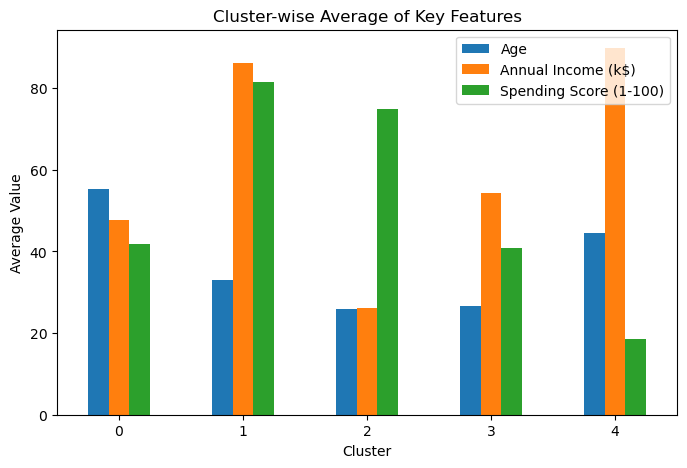

In [16]:
cluster_summary.plot(kind='bar', figsize=(8,5))
plt.title('Cluster-wise Average of Key Features')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.show()

Below are the key findings:

Cluster 0 – Mature, Balanced Spenders 🧍‍♂️🧍‍♀️
Moderate Age (~55), balanced Income and Spending.
Represents steady, reliable customers with consistent buying behavior.
Strategy: Maintain engagement through loyalty rewards and personalized offers.

Cluster 1 – Young, High-Income, High-Spending Trendsetters 💎
Relatively younger group with very high income and high spending score.
Represents premium shoppers — key drivers of profit.
Strategy: Focus on exclusivity — premium memberships, early access to collections.

Cluster 2 – Young, Average Income, High Spending 🎯
Younger audience with mid-range income but very active spending behavior.
Indicates aspirational buyers who value experience and trends.
Strategy: Target through social media, seasonal offers, and influencer campaigns.

Cluster 3 – Older, Low Income, Low Spending 💤
Higher average age, lowest income and spending levels.
Conservative buyers with minimal engagement.
Strategy: Use awareness campaigns or family offers; low marketing priority.

Cluster 4 – Mid-Age, High Income, Low Spending 💼
Good income but low spending score, suggesting savings-oriented or selective shoppers.
Strategy: Upsell through trust-building, product quality, and value-based promotions.

Final Conclusion
Customer segmentation reveals that spending behavior doesn’t always scale with income; personality and lifestyle play key roles.
Young, high-spending groups offer immediate ROI, while budget-conscious segments present long-term potential if nurtured properly.
K-Means clustering enables data-driven marketing, replacing assumptions with measurable customer personas.